In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from SIFT import ScaleRotInvSIFT, NaiveSIFT
from runner import SIFTRunner
from utils import *

92 matches from 1340 corners
1340 corners in image 1, 1645 corners in image 2


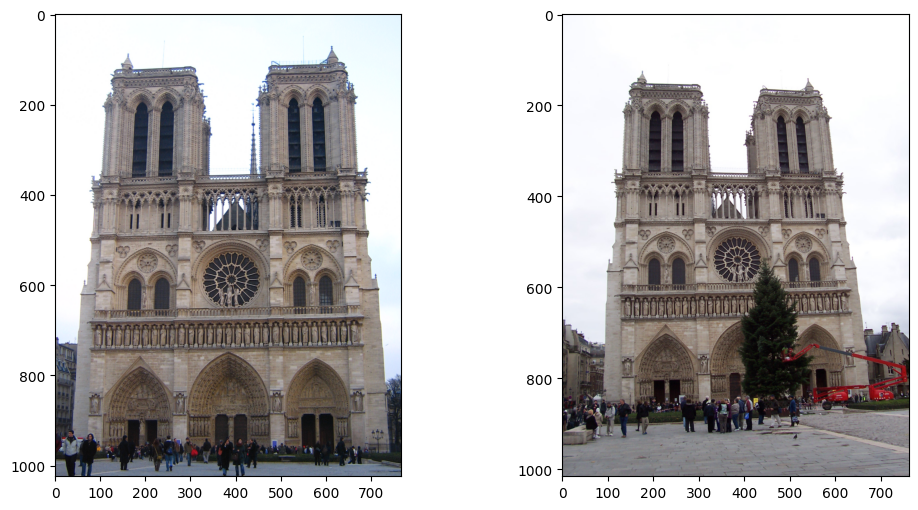

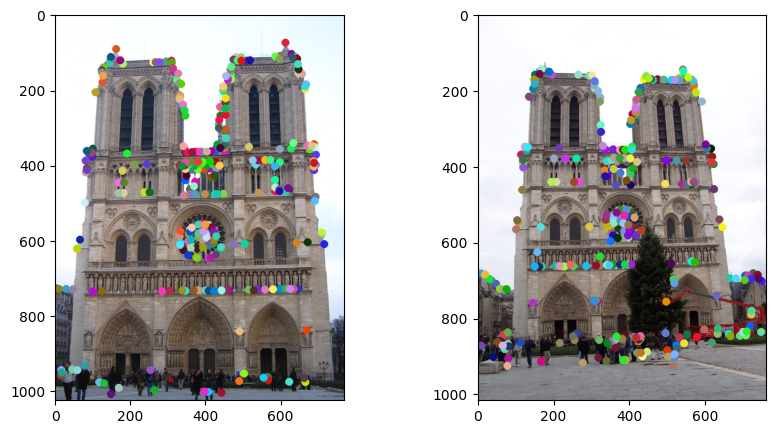

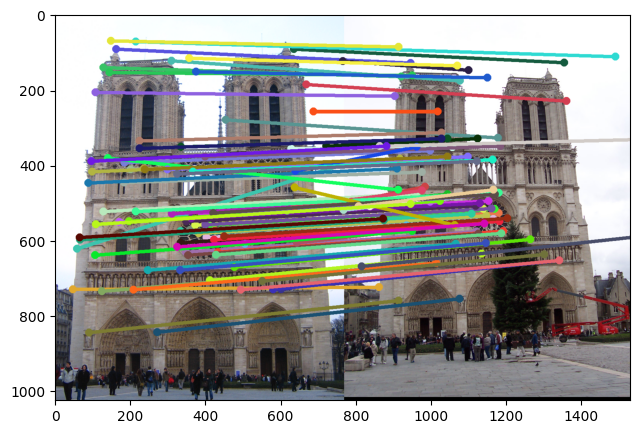

In [2]:
SIFTrunner = SIFTRunner("test_data/a.jpg", "test_data/b.jpg", sift_model=ScaleRotInvSIFT, print_img=True, print_harris=True, print_sift=True)

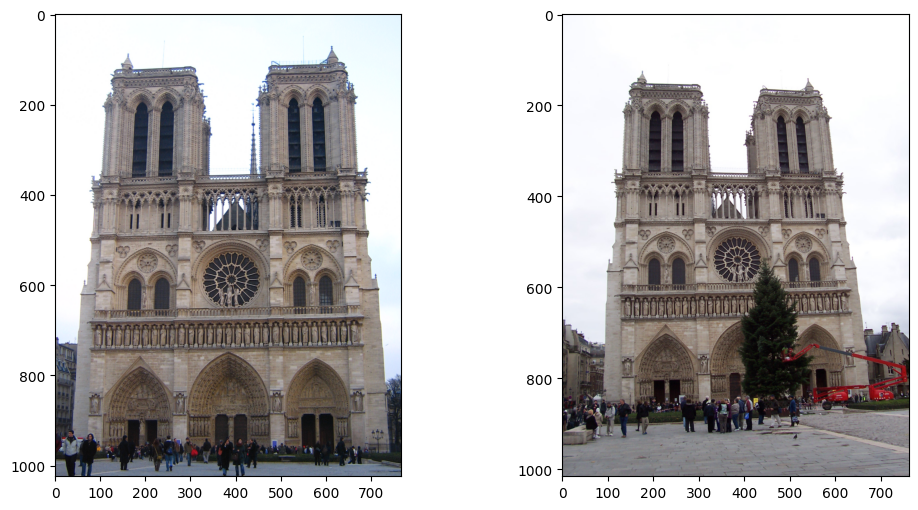

In [ ]:
# Notre Dame
image1 = load_image('test_data/a.jpg')
image2 = load_image('test_data/b.jpg')
eval_file = '../ground_truth/notredame.pkl'

# # Mount Rushmore -- this pair is relatively easy (still harder than Notre Dame, though)
# image1 = load_image('../data/2a_rushmore.jpg')
# image2 = load_image('../data/2b_rushmore.jpg')
# eval_file = '../ground_truth/rushmore.pkl'

# # Episcopal Gaudi -- This pair is relatively difficult
# image1 = load_image('../data/3a_gaudi.jpg')
# image2 = load_image('../data/3b_gaudi.jpg')
# eval_file = '../ground_truth/gaudi.pkl'

scale_factor = 0.5
image1 = PIL_resize(image1, (int(image1.shape[1]*scale_factor), int(image1.shape[0]*scale_factor)))
image2 = PIL_resize(image2, (int(image2.shape[1]*scale_factor), int(image2.shape[0]*scale_factor)))

image1_bw = rgb2gray(image1)
image2_bw = rgb2gray(image2)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(image1)
plt.subplot(1,2,2)
plt.imshow(image2)

In [ ]:
SIFTdetector = NaiveSIFT(image_bw=image1_bw)

In [ ]:
from utils import show_correspondence_circles, show_correspondence_lines, save_image, match_features_ratio_test
X1, Y1, _ = SIFTdetector._find_harris_interest_points(image1_bw, 2500, 16)
X2, Y2, _ = SIFTdetector._find_harris_interest_points(image2_bw, 2500, 16)
image1_features = SIFTdetector._get_SIFT_descriptors(image1_bw, X1, Y1, feature_width=16)
image2_features = SIFTdetector._get_SIFT_descriptors(image2_bw, X2, Y2, feature_width=16)

# Match features between the two images
matches, confidences = match_features_ratio_test(image1_features, image2_features)
print('{:d} matches from {:d} corners'.format(len(matches), len(X1)))

125 matches from 2463 corners


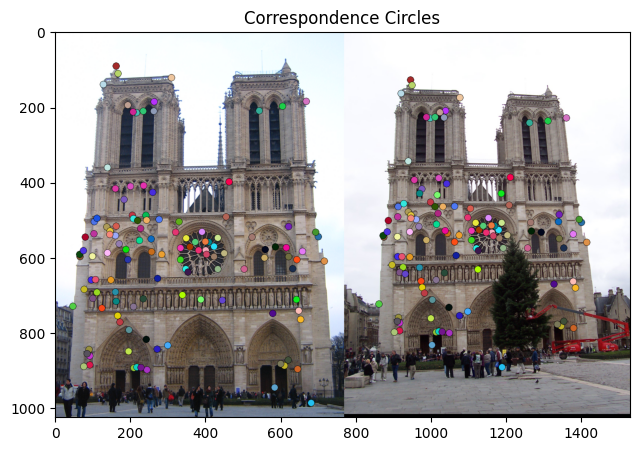

In [ ]:
# Visualize the top matches
num_pts_to_visualize = min(200, len(matches))  # Limit to 200 or total matches if fewer
c1 = show_correspondence_circles(
    image1,
    image2,
    X1[matches[:num_pts_to_visualize, 0]],
    Y1[matches[:num_pts_to_visualize, 0]],
    X2[matches[:num_pts_to_visualize, 1]],
    Y2[matches[:num_pts_to_visualize, 1]]
)

# Display circles
plt.figure(figsize=(10, 5))
plt.title("Correspondence Circles")
plt.imshow(c1)
plt.show()

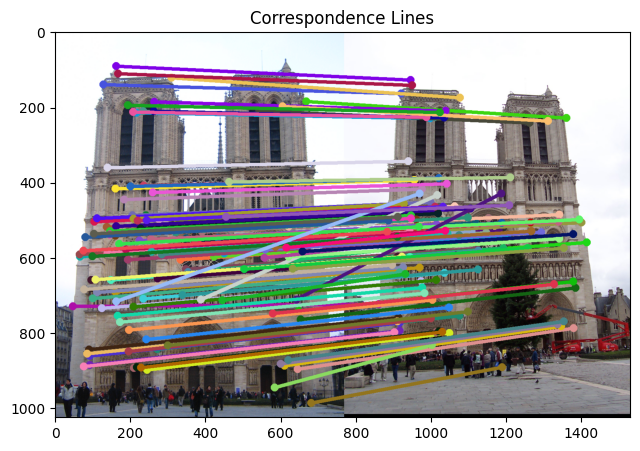

In [ ]:
# Display correspondence lines
c2 = show_correspondence_lines(
    image1,
    image2,
    X1[matches[:num_pts_to_visualize, 0]],
    Y1[matches[:num_pts_to_visualize, 0]],
    X2[matches[:num_pts_to_visualize, 1]],
    Y2[matches[:num_pts_to_visualize, 1]]
)

plt.figure(figsize=(10, 5))
plt.title("Correspondence Lines")
plt.imshow(c2)
plt.show()

In [ ]:
# Get expected orientation from OpenCV
magnitudes = np.ones(100)
orientations = np.concatenate([
    np.full(50, np.pi / 4),    # 50 pixels with 45-degree orientation
    np.full(50, -np.pi / 4)    # 50 pixels with -45-degree orientation
])

# Convert orientations to the range [0, 360] for OpenCV (in degrees)
orientations_deg = np.degrees(orientations + np.pi) % 360  # Convert from radians to [0, 360]
magnitudes = magnitudes.astype(np.float32)

# Calculate histogram using OpenCV
hist = cv2.calcHist([orientations_deg.astype(np.float32)], [0], None, [36], [0, 360])

# Find the peak bin in the histogram
peak_bin = np.argmax(hist)
peak_angle_deg = (peak_bin + 0.5) * 10  # Each bin is 10 degrees wide

print("OpenCV Histogram Counts:", hist.ravel())
print("Peak Angle (Degrees):", peak_angle_deg)
print("Expected Peak Orientation (in radians):", np.radians(peak_angle_deg) - np.pi)


OpenCV Histogram Counts: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 50.  0.  0.  0.  0.
  0.  0.  0.  0. 50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Peak Angle (Degrees): 135.0
Expected Peak Orientation (in radians): -0.7853981633974483


In [ ]:
magnitudes = np.ones(100)
orientations = np.concatenate([
    np.full(50, np.pi / 4),    # 50 pixels with 45-degree orientation
    np.full(50, -np.pi / 4)    # 50 pixels with -45-degree orientation
])

dominant_orientation = SIFTdetector.compute_dominant_orientation(magnitudes, orientations)
print("Computed Dominant Orientation:", dominant_orientation)

Computed Dominant Orientation: -0.7853981633974483


In [ ]:
import cv2
import numpy as np

# Example orientations and magnitudes (repeat synthetic data)
magnitudes = np.ones(100)
orientations = np.concatenate([
    np.full(50, np.pi / 4),    # 50 pixels with 45-degree orientation
    np.full(50, -np.pi / 4)    # 50 pixels with -45-degree orientation
])

# Convert orientations to the range [0, 360] for OpenCV (in degrees)
orientations_deg = np.degrees(orientations + np.pi) % 360  # Convert from radians to [0, 360]
magnitudes = magnitudes.astype(np.float32)

# Calculate histogram using OpenCV
hist = cv2.calcHist([orientations_deg.astype(np.float32)], [0], None, [36], [0, 360])

# Find the peak bin in the histogram
peak_bin = np.argmax(hist)
peak_angle_deg = (peak_bin + 0.5) * 10  # Each bin is 10 degrees wide

print("OpenCV Histogram Counts:", hist.ravel())
print("Peak Angle (Degrees):", peak_angle_deg)
print("Expected Peak Orientation (in radians):", np.radians(peak_angle_deg) - np.pi)


OpenCV Histogram Counts: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 50.  0.  0.  0.  0.
  0.  0.  0.  0. 50.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Peak Angle (Degrees): 135.0
Expected Peak Orientation (in radians): -0.7853981633974483
